# Research assignment 4


Alisha Jones 

CPES data replication 

March 18, 2020

## 1. Develop hypotheses about interactions between your independent variables [1 pt]

You can use the GSS data, Student aid data, or your own data

    A. Write at least two hypotheses involving at least 2 of the following types of interactions
        1) nominal * nominal
        2) nominal * interval-ratio
        3) interval-ratio * interval-ratio
        
    B. State the predicted direction of association between your dependent variable and:
        1) each of the 2 independent variables by themselves
        2) the interaction of the 2 indendent variables
        3) you can predict that there is no association
        
    C. Write a couple sentences about the theoretical reasons (prior knowledge / research) for each of your predictions

In [ ]:
A. 
Hypotheses 1: 
nominal x nominal interaction,race x sex :Older White men have higher income than women coded as black and other. 

Hypotheses 2: 
interval-ratio x interval-ratio interaction, Age x hours worked per week: Individuals that are older and work more houurs a week make more money. 

B. 
hypotheses 1: I predict that race will moderate sex. I think that race will negatively influnce income for individuals not coded as white, and sex will negatively influence income for women. 
hypotheses 2: I predict that hours worked per week will moderate age. I think that age will be a positively influence income, and hours worked per week will also positively influence income. 

C. I am trying to replicate the lesson that we did last week with my own data. In class we discovered that race was more of a moderator for income than sex. I thought it would be intresting to apply this to another dataset and different measures of race. 


In [90]:
clear 
set more off 
capture log close using assignment4log.log 
use G10A G10B SEX HHINC ED4CAT AGE RANCEST D25 using "20240-0003-Data.dta", clear
gen AGE2=AGE^2





(Collaborative Psychiatric Epidemiology Surveys (CPES), 2001-2003 [United States])



## 2. Test your hypotheses [3 pts]

    A. For each hypothesized interactive relationship: use regression with the appropriate interaction syntax to estimate a 1 model with uninteracted variables and 1 model with interacted variables. Use --esttab-- with %html magic to output a model with the 2 tables
    
    B. Use margins and marginsplot with the appropriate syntax to visually represent your regression adjusted estimates for given nominal categories or at given interval-ratio values

In [91]:
** Hypotheses 1

xi i.RANCEST*i.SEX, noomit


i.RAN~T*i.SEX     _IRANXSEX_#_#       (coded as above)


In [92]:
est clear
eststo: reg HHINC i.RANCEST i.SEX AGE AGE2
eststo: reg HHINC i.RANCEST##i.SEX AGE AGE2




      Source |       SS           df       MS      Number of obs   =     6,082
-------------+----------------------------------   F(6, 6075)      =     91.85
       Model |  4.9346e+11         6  8.2243e+10   Prob > F        =    0.0000
    Residual |  5.4399e+12     6,075   895449388   R-squared       =    0.0832
-------------+----------------------------------   Adj R-squared   =    0.0823
       Total |  5.9333e+12     6,081   975713064   Root MSE        =     29924

------------------------------------------------------------------------------------
             HHINC |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------------+----------------------------------------------------------------
           RANCEST |
   AFRO-CARIBBEAN  |   3405.317   2349.089     1.45   0.147     -1199.73    8010.364
 AFRICAN AMERICAN  |  -6305.475    2269.98    -2.78   0.005    -10755.44    -1855.51
NON-LATINO WHITES  |   4630.845   2434.429     1.90   0.057    -141.4982    

In [93]:
%html
esttab, stats(r2 N, labels("R2" "N") fmt(%10.2fc %10.0fc)) cells(b(star fmt(%10.0fc)) se(fmt(%6.0fc) par) N (fmt(%10.0fc)) r2 (fmt(%10.2f))) ///
  nobase noconstant starlevels(* .1 ** .05 *** .01) mlabels("Model 1" "Model 2") drop(AGE AGE2 _cons) html


This front-end or document format cannot display HTML


(61 missing values generated)




  Variables that uniquely identify margins: SEX RANCEST


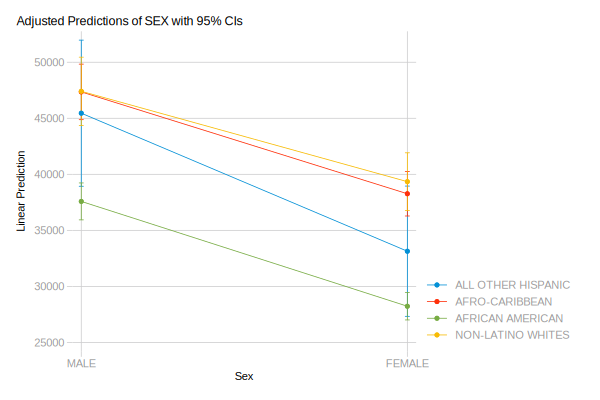






) required



In [94]:
gen HHINCln=log(HHINC)

quietly eststo: reg HHINC i.RANCEST##i.SEX AGE AGE2
quietly margins i.SEX, over(RANCEST) atmeans
marginsplot, scheme(538w)

quietly eststo: reg HHINC i.RANCEST##i.SEX AGE AGE2 
quietly margins i.RANCEST, over(SEX) atmeans
marginsplot, scheme(538w


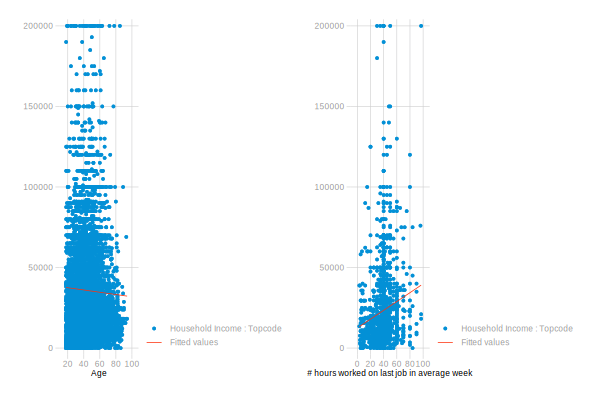

In [95]:
*** Hypotheses 2

quietly twoway (scatter HHINC AGE) (lfit HHINC AGE), name(AGE, replace) scheme(538w)
quietly twoway (scatter HHINC D25) (lfit HHINC D25), name(D25, replace) scheme(538w)

graph combine AGE D25, scheme(538w)

In [96]:
est clear

eststo: reg HHINC AGE D25 ED4CAT i.RANCEST i.SEX
eststo: reg HHINC c.D25##c.AGE ED4CAT i.RANCEST i.SEX




      Source |       SS           df       MS      Number of obs   =     1,784
-------------+----------------------------------   F(7, 1776)      =     49.49
       Model |  1.8075e+11         7  2.5821e+10   Prob > F        =    0.0000
    Residual |  9.2669e+11     1,776   521783006   R-squared       =    0.1632
-------------+----------------------------------   Adj R-squared   =    0.1599
       Total |  1.1074e+12     1,783   621108290   Root MSE        =     22843

------------------------------------------------------------------------------------
             HHINC |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------------+----------------------------------------------------------------
               AGE |   13.73125   28.02184     0.49   0.624      -41.228     68.6905
               D25 |   164.5385    42.8659     3.84   0.000     80.46555    248.6114
            ED4CAT |   8290.508   552.0118    15.02   0.000     7207.847    9373.169
            

In [97]:
%html
esttab, stats(r2 N, labels("R2" "N")) cells(b(star fmt(3)) se(fmt(3) par)) ///
 * nobase noconstant starlevels(* .1 ** .05 *** .01) mlabels("Model 1" "Model 2") drop(_cons educ 2.race 3.race 2.sex) ///
  *coeflabels (age "Age" yearsjob "Work experience" c.age#c.yearsjob "Age * work experience") 
html

This front-end or document format cannot display HTML




  Variables that uniquely identify margins: D25 AGE


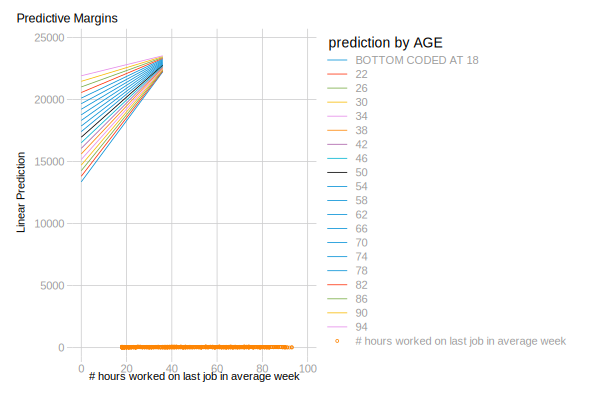

In [98]:
quietly margins, at(D25=(0(4)37) AGE=(18(4)94))vsquish
marginsplot, noci x(D25) recast(line) addplot(scatter D25 AGE, m(oh)) xlabel(20(4)94) scheme(538w) legend(title(prediction by AGE)) 

## 3. Interpret your results [1 pt]

Write a couple sentences answering each of the following questions:

    A. Do the results support or contradict each of your hypotheses?
    
    B. Why do the regression coefficients support or contradict your hypotheses?
    
    C. Why do your regression adjusted estimates from margins for nominal categories or given interval-ratio values support or contradict your hypotheses?

In [ ]:
For my 1st hypotheses, my results do not support my hypotheses. My regression coefficients show that whites made more money than Afro-Caribbeans, African Americans, and Latinos. However, White women have higher income than Afro-Caribbean and African American women.
For my 2nd hypotheses,my results also do not support my hypotheses. My regression coefficients show that being older and working more hours per week actually has a negative influence on income. Individuals that were older and worked more hours per week made less money.For my 1st hypotheses, 
my regression adjusted estimates contradict my hypotheses because there is a significant difference by sex for every racial group.For my 2nd hypotheses 
My regression adjusted estimates contradict my hypotheses becasuse there seems to be no association betweeen age and hours worked per week. 